# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import re
from unidecode import unidecode
# Reading and Summarizing Text Data
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim
from gensim.parsing.preprocessing import STOPWORDS


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Feature Engineering

### Read Data

In [2]:
data = pd.read_csv("amazonreviews.tsv", delimiter="\t")

In [3]:
data.head(5)

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [4]:
# shape of dataset 
data.shape

(10000, 2)

In [5]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [6]:
data["label"].value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

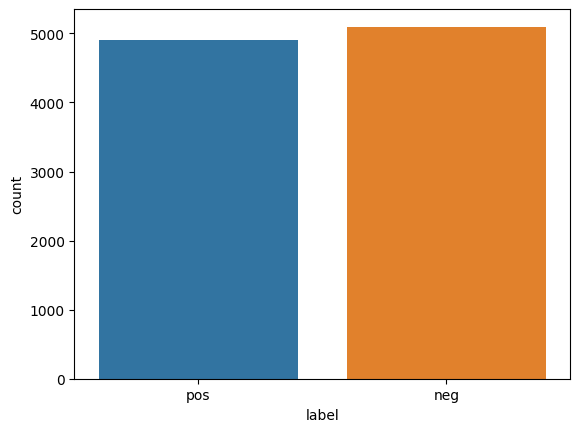

In [7]:
sns.countplot(x= data["label"])

In [8]:
# show the number of null values in data
data.isnull().sum()

label     0
review    0
dtype: int64

In [9]:
#droup the null value in dataset
data = data.dropna()

In [10]:
#let's check if there is duplicate values
duplicates = data[data.duplicated()]
print(f'Number of duplicate rows: {len(duplicates)}')

Number of duplicate rows: 0


In [11]:
data.drop_duplicates(inplace=True)
if data.duplicated().sum()==0:   
    print('Duplicates Removed')
else:
    print('there is still duplicates')

Duplicates Removed


In [12]:
# show the number of null values in data After  remove the null values
data.isnull().sum()

label     0
review    0
dtype: int64

In [13]:
data.shape

(10000, 2)

In [14]:
data["label"].value_counts()

label
neg    5097
pos    4903
Name: count, dtype: int64

In [15]:
data.describe()

,label,review
count,10000,10000
unique,2,10000
top,neg,Stuning even for the non-gamer: This sound tra...
freq,5097,1


In [16]:
print(data["review"].value_counts())

review
Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                1
Excellent perspective from a member o

In [17]:
# Length: refers to the number of characters, words, or sentences in a piece of text.

#Polarity and Subjectivity

data["length"] = data["review"].apply(len)

data["length"]

0       426
1       509
2       760
3       743
4       481
       ... 
9995    867
9996    861
9997    650
9998    135
9999    536
Name: length, Length: 10000, dtype: int64

In [18]:
#Polarity refers to the sentiment or the degree of positivity or negativity in a piece of text. 
def get_polarity(text):
    textblob = TextBlob(str(text.encode("utf-8")))
    pol = textblob.sentiment.polarity
    return pol

#Subjectivity: Subjectivity refers to the degree of objectivity or subjectivity in a piece of text.
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode("utf-8")))
    pol = textblob.sentiment.subjectivity
    return pol

In [19]:
data["Polarity"] = data["review"].apply(get_polarity)
data["Subjectivity"] = data["review"].apply(get_subjectivity)

data[['length', 'Polarity', 'Subjectivity']].describe()

,length,Polarity,Subjectivity
count,10000.000000,10000.000000,10000.000000
mean,438.695400,0.145060,0.532437
std,239.241132,0.247260,0.149731
min,101.000000,-1.000000,0.000000
25%,238.000000,0.000000,0.447712
50%,391.000000,0.150000,0.533889
75%,605.000000,0.298713,0.620888
max,1015.000000,1.000000,1.000000


In [20]:
# Words , Characters and punctuation

data["charsCount"] = data["review"].apply(len)
data["wordCount"] = data["review"].apply(lambda x: len(x.split()))
data["word_density"] = data["charsCount"] / (data["wordCount"]+1)

data[['charsCount', 'wordCount', 'word_density']].describe()

,charsCount,wordCount,word_density
count,10000.000000,10000.000000,10000.000000
mean,438.695400,79.553100,5.423047
std,239.241132,43.023225,0.447279
min,101.000000,14.000000,3.966667
25%,238.000000,43.000000,5.122718
50%,391.000000,71.000000,5.393939
75%,605.000000,109.000000,5.689777
max,1015.000000,212.000000,8.457143


In [21]:
punctuation = string.punctuation

print(punctuation , end = "\n\n")

# calculating count of punctuation
data['punctuation_count'] = data['review'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation)))

print(data[['charsCount', 'wordCount', 'word_density', 'punctuation_count']].describe())
print(data.head())

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

         charsCount     wordCount  word_density  punctuation_count
count  10000.000000  10000.000000  10000.000000       10000.000000
mean     438.695400     79.553100      5.423047          14.571900
std      239.241132     43.023225      0.447279           9.624245
min      101.000000     14.000000      3.966667           1.000000
25%      238.000000     43.000000      5.122718           8.000000
50%      391.000000     71.000000      5.393939          12.000000
75%      605.000000    109.000000      5.689777          19.000000
max     1015.000000    212.000000      8.457143         229.000000
  label                                             review  length  Polarity   
0   pos  Stuning even for the non-gamer: This sound tra...     426 -0.021875  \
1   pos  The best soundtrack ever to anything.: I'm rea...     509  0.261111   
2   pos  Amazing!: This soundtrack is my favorite music...     760  0.274691   
3   pos  Excellent Soundtrack: I truly like

# Data Cleaning

In [22]:
#lower case
data['review'] = data['review'].apply(lambda x:  x.lower())

data['review'].head()

0    stuning even for the non-gamer: this sound tra...
1    the best soundtrack ever to anything.: i'm rea...
2    amazing!: this soundtrack is my favorite music...
3    excellent soundtrack: i truly like this soundt...
4    remember, pull your jaw off the floor after he...
Name: review, dtype: object

In [23]:
# remove punctuations
def punctuation_removal(messy_text):
    clean_list = [char for char in messy_text if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

data['review'] = data['review'].apply(punctuation_removal)

data['review'].head()

0    stuning even for the nongamer this sound track...
1    the best soundtrack ever to anything im readin...
2    amazing this soundtrack is my favorite music o...
3    excellent soundtrack i truly like this soundtr...
4    remember pull your jaw off the floor after hea...
Name: review, dtype: object

In [24]:
# removing numbers

def numbers_removal(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d',i):
            list_text_new.append(i)
    return ''.join(list_text_new)


data['review'] = data['review'].apply(numbers_removal)

data['review'].head()

0    stuning even for the nongamer this sound track...
1    the best soundtrack ever to anything im readin...
2    amazing this soundtrack is my favorite music o...
3    excellent soundtrack i truly like this soundtr...
4    remember pull your jaw off the floor after hea...
Name: review, dtype: object

In [25]:
#Removing Emails
def remove_Emails(text):
    pattern=r'\S+@\S+'
    text=re.sub(pattern,'',text)
    return text

#Removing URLS
def remove_URLS(text):
    pattern=r'http\S+'
    text=re.sub(pattern,'',text)
    return text

data['review'] = data['review'].apply(remove_Emails ,remove_URLS )

data['review'].head()

0    stuning even for the nongamer this sound track...
1    the best soundtrack ever to anything im readin...
2    amazing this soundtrack is my favorite music o...
3    excellent soundtrack i truly like this soundtr...
4    remember pull your jaw off the floor after hea...
Name: review, dtype: object

In [26]:
# removing Special Characters & accents

def special_char_removal(text):
    pat = r'^[a-zA-Z0-9]'
    string = re.sub(pat,'',text[0]+text)
    return unidecode(string)

data['review'] = data.apply(lambda x:  special_char_removal(x['review']),axis=1)

data['review'].head()

0    stuning even for the nongamer this sound track...
1    the best soundtrack ever to anything im readin...
2    amazing this soundtrack is my favorite music o...
3    excellent soundtrack i truly like this soundtr...
4    remember pull your jaw off the floor after hea...
Name: review, dtype: object

In [27]:
# Stop Words in nltk 
stop_word = set(STOPWORDS)
print(stop_word , end = '\n\n')
stop_words = set(stopwords.words('english'))
print(stop_words)

def remove_stopwords_custom(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords from the list of tokens
    tokens_filtere = [word for word in tokens if word.lower() not in stop_words]
    tokens_filtered = [word for word in tokens_filtere if word.lower() not in stop_word]
    # Join the list of tokens back into a single string
    text_filtered = ' '.join(tokens_filtered)
    # Remove additional unwanted characters using a decoding method
    text_filtered = text_filtered.encode('ascii', 'ignore').decode('utf-8')
    return text_filtered

data['review'] = data['review'].apply(remove_stopwords_custom)

{'ourselves', 'are', 'each', 'seems', 'besides', 'whereas', 'interest', 'de', 'found', 'did', 'wherein', 'now', 'we', 'done', 'namely', 'herein', 'everyone', 'they', 'from', 'made', 'one', 'thick', 'using', 'ours', 'used', 'anything', 'an', 'because', 'all', 'ie', 'she', 'hers', 'those', 'upon', 'please', 'this', 'only', 'always', 'beyond', 'same', 'further', 'might', 'amongst', 'part', 'never', 'them', 'wherever', 'cannot', 'next', 'per', 'very', 'thereupon', 'via', 'hereupon', 'whoever', 'into', 'mill', 'no', 'neither', 'enough', 'fill', 'nor', 'eight', 'detail', 'already', 'often', 'how', 'meanwhile', 'afterwards', 'somehow', 'must', 'move', 'thence', 'about', 'between', 'perhaps', 'so', 'has', 'on', 'serious', 'above', 'don', 'again', 'until', 'anyone', 'several', 'together', 'along', 'own', 'during', 'nevertheless', 'yours', 'everywhere', 'fifteen', 'two', 'ever', 'rather', 'etc', 'hence', 'its', 'first', 'mine', 'full', 'amount', 'my', 'whole', 'throughout', 'by', 'what', 'that',

In [28]:
data['review'].head()

0    stuning nongamer sound track beautiful paints ...
1    best soundtrack im reading lot reviews saying ...
2    amazing soundtrack favorite music time hands i...
3    excellent soundtrack truly like soundtrack enj...
4    remember pull jaw floor hearing youve played g...
Name: review, dtype: object

In [29]:
# function for stemming

def get_stem(text):
    stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

data['review'] = data['review'].apply(get_stem)

In [30]:
data['review'].head()

0    stune nongam sound track beauti paint seneri m...
1    best soundtrack im read lot review say best ga...
2    amaz soundtrack favorit music time hand intens...
3    excel soundtrack truli like soundtrack enjoy v...
4    rememb pull jaw floor hear youv play game know...
Name: review, dtype: object

In [31]:
# function for lemmatization
import spacy
nlp = spacy.load('en_core_web_sm')

def get_lem(text):
    text = nlp(text)
    lemmatized_sentence = " ".join([word.lemma_ for word in text])
    return lemmatized_sentence

    


data['review'] = data['review'].apply(get_lem)

In [32]:
data['review'].head()

0    stune nongam sound track beauti paint seneri m...
1    good soundtrack I m read lot review say good g...
2    amaz soundtrack favorit music time hand inten ...
3    excel soundtrack truli like soundtrack enjoy v...
4    rememb pull jaw floor hear youv play game know...
Name: review, dtype: object

# Feature Extraction

In [33]:
# label encoder
from sklearn.preprocessing import LabelEncoder

labels = data['label']
encoder = LabelEncoder()
label = encoder.fit_transform(labels)
print(label)

[1 1 1 ... 0 0 1]


In [34]:
#bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.feature_extraction.text import CountVectorizer


cv = TfidfVectorizer(max_features=9000,ngram_range=(1,50))

X = cv.fit_transform(data['review']).toarray()


idf_values = cv.idf_


vocabulary = cv.vocabulary_


[0. 0. 0. ... 0. 0. 0.]


In [36]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split ( X , label , test_size= 0.2 ,shuffle= True )

In [37]:
X_train.shape

(8000, 9000)

# Bulid model 

In [38]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# MultinomialNB 
model = MultinomialNB(alpha = 1.0111)
model.fit(X_train , y_train)
print("MultinomialNB: ",model.score(X_test , y_test))

# SVC
model1 = SVC(C = 11.11 ,gamma=1.11 ,degree= 6)
model1.fit(X_train , y_train)
print("SVC: ",model1.score(X_test , y_test))

# GaussianNB 
model2 = GaussianNB()
model2.fit(X_train , y_train)
print("GaussianNB: ",model2.score(X_test , y_test))


# KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors= 100)
model3.fit(X_train , y_train)
print("NearestNeighbors: ",model3.score(X_test , y_test))


# DecisionTreeClassifier
model4= DecisionTreeClassifier(max_depth = 100)
model4.fit(X_train , y_train)
print("DecisionTreeClassifier: ",model4.score(X_test , y_test))

# LogisticRegression
model5=LogisticRegression(random_state=42)
model5.fit(X_train , y_train)
print("LogisticRegression: ",model5.score(X_test , y_test))


# RandomForestClassifier
model6= RandomForestClassifier(n_estimators  = 100 ,random_state=42)
model6.fit(X_train , y_train)
print("RandomForestClassifier: ",model6.score(X_test , y_test) )


MultinomialNB:  0.8385
SVC:  0.855
GaussianNB:  0.7265
NearestNeighbors:  0.805
DecisionTreeClassifier:  0.7185
LogisticRegression:  0.8575
RandomForestClassifier:  0.834


## Create Voting Model 

In [57]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[('svm', model1), ('lr', model5) , ('mnb', model)], voting='hard')
ensemble_model = ensemble_model.fit(X_train, y_train)

accuracy = ensemble_model.score(X_test, y_test)
print('Accuracy of the loaded model:', accuracy)


Accuracy of the loaded model: 0.861


### save model

In [60]:
import pickle


# Save the trained model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(ensemble_model , file)

### save vocabulary & idf_values

In [61]:
import pickle

np.save('idf_values.npy', idf_values)

with open('vocabulary.pkl', 'wb') as fp:
    pickle.dump(vocabulary, fp)
    print('vocabulary saved successfully to file')

vocabulary saved successfully to file
